In [1]:
from time import sleep

import numpy as np

from qcodes.dataset import do0d, load_or_create_experiment
from qcodes.instrument import Instrument
from qcodes.instrument_drivers.stanford_research import SR830
from qcodes.validators import Numbers

In [2]:
sr = SR830('lockin', 'GPIB0::1::INSTR')

Connected to: Stanford_Research_Systems SR830 (serial:s/n83931, firmware:ver1.07) in 0.38s


C:\Users\jmborit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\qcodes\instrument\instrument_base.py:143: QCoDeSDeprecationWarning: Parameter ch1_databuffer on instrument lockin does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(
C:\Users\jmborit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\qcodes\instrument\instrument_base.py:143: QCoDeSDeprecationWarning: Parameter ch2_databuffer on instrument lockin does not correctly pass kwargs to its baseclass. A Parameter class must take `**kwargs` and forward them to its baseclass.
  warnings.warn(


In [3]:
load_or_create_experiment(experiment_name='SR830_notebook')

SR830_notebook#some_sample#1@C:\Users\jmborit\experiments.db
------------------------------------------------------------

In [4]:
sr.print_readable_snapshot()

lockin:
	parameter       value
--------------------------------------------------------------------------------
IDN              :	{'vendor': 'Stanford_Research_Systems', 'model': 'SR830', ...
P                :	None (deg)
R                :	None (V)
R_offset         :	None 
X                :	None (V)
X_offset         :	None 
Y                :	None (V)
Y_offset         :	None 
amplitude        :	None (V)
aux_in1          :	None (V)
aux_in2          :	None (V)
aux_in3          :	None (V)
aux_in4          :	None (V)
aux_out1         :	None (V)
aux_out2         :	None (V)
aux_out3         :	None (V)
aux_out4         :	None (V)
buffer_SR        :	1 (Hz)
buffer_acq_mode  :	None 
buffer_npts      :	None 
buffer_trig_mode :	None 
ch1_databuffer   :	Not available (V)
ch1_datatrace    :	Not available (V)
ch1_display      :	X 
ch1_ratio        :	none 
ch2_databuffer   :	Not available (V)
ch2_datatrace    :	Not available (V)
ch2_display      :	Y 
ch2_ratio        :	none 
complex_voltage  :	None

In [5]:
sr.complex_voltage()

(-1.90736e-06+9.53682e-07j)

In [6]:
sr.autorange(max_changes=2)

In [7]:
sr.ch1_display('X')
sr.ch1_ratio('none')
sr.buffer_SR(512)  # Sample rate (Hz)
sr.buffer_trig_mode.set('OFF')

In [8]:
sr.buffer_reset()
sr.buffer_start() # Start filling the buffers with 512 pts/s
sleep(1)
sr.buffer_pause()  # Stop filling buffers

Starting experimental run with id: 1. Using 'qcodes.dataset.do0d'


(results #1@C:\Users\jmborit\experiments.db
 ------------------------------------------
 lockin_sweep_setpoints - array
 lockin_ch1_datatrace - array,
 (<Axes: title={'center': 'Run #1, Experiment SR830_notebook (some_sample)'}, xlabel='Time (ms)', ylabel='X (μV)'>,),
 (None,))

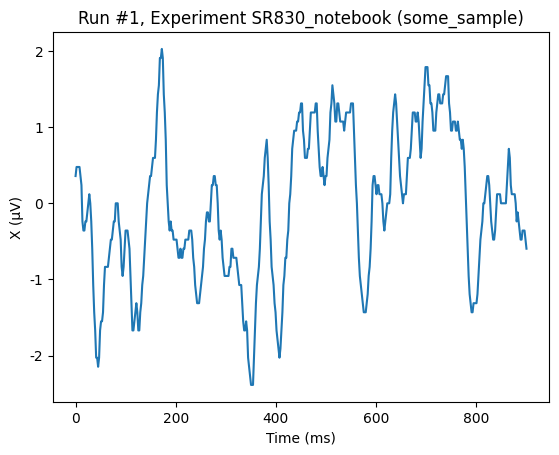

In [9]:
do0d(sr.ch1_datatrace, do_plot=True)

In [10]:
sr.complex_voltage()

(5.9605e-07-4.76841e-07j)

In [12]:
sr.R()

8.34469e-07

In [13]:
sr.R(3e-6)

NotImplementedError: no set cmd found in Parameter R

In [19]:
sr.set('amplitude', 2.5)

In [26]:
sr.set('frequency', 3)

In [32]:
sr.R()

0.0

In [33]:
sr.device_clear()

In [34]:
sr.reset()

In [35]:
sr.R()

0.000122071

In [36]:
sr.R()

0.000244142

In [37]:
sr.reset()
sr.R()

0.00158692